In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../csvki/cancer.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataset = dataset.drop(["id"], axis=1)

In [5]:
M = dataset[dataset.diagnosis == "M"]

In [6]:
B = dataset[dataset.diagnosis == "B"]

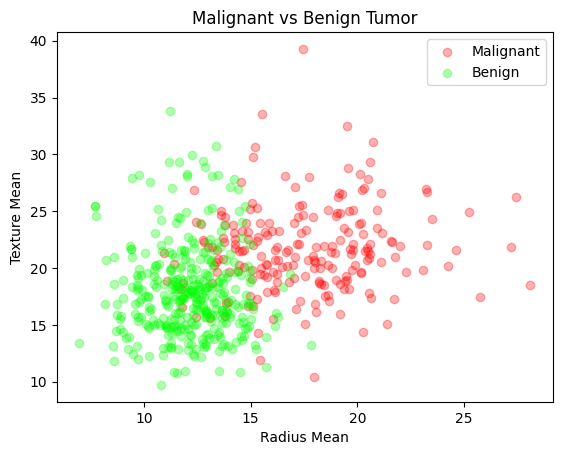

In [7]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha=0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha=0.3)
plt.legend()
plt.show()

In [8]:
dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]

In [9]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [10]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [14]:
print("Naive Bayes: ", nb.score(X_test, y_test))

Naive Bayes:  0.9415204678362573


### VLagun Lab Basins

In [15]:
dataset = pd.read_csv('../csvki/VLagun_Lab_Basins.csv')

In [16]:
dataset.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,DOC,TPOC,Windspeedinsitu,Depth,DINtoDIP,Cyanobacteria,Chlorophyceae,Diatomophyceae,picophytoplankton,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,7.500,8.5650,3.5,3.3,17.428571,2.35,3.08,0.230,3.20,East
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,7.860,8.5200,0.0,3.6,10.227273,6.39,2.87,0.010,2.42,East
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,7.535,8.4706,4.0,3.2,4.871795,2.05,7.47,0.060,2.61,East
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,7.282,8.7020,3.5,3.0,6.351351,6.30,5.03,0.110,2.49,East
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,7.370,7.8796,4.0,3.7,4.420290,3.77,5.69,0.005,1.73,East


In [17]:
East = dataset[dataset.Basin == 'East']
West = dataset[dataset.Basin == 'West']

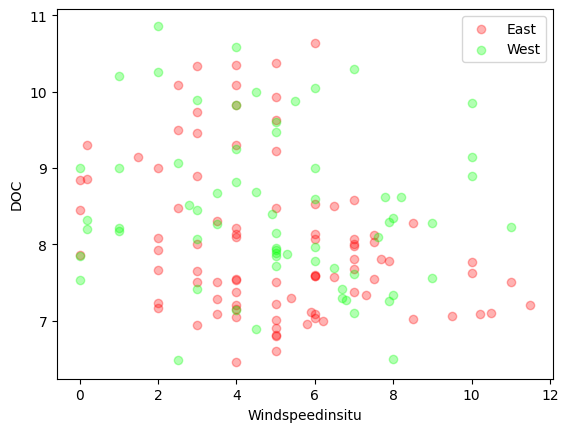

In [18]:
plt.xlabel("Windspeedinsitu")
plt.ylabel("DOC")
plt.scatter(East.Windspeedinsitu, East.DOC, color = "red", label = "East", alpha=0.3)
plt.scatter(West.Windspeedinsitu, West.DOC, color = "lime", label = "West", alpha=0.3)
plt.legend()
plt.show()

In [19]:
dataset.Basin = [1 if i == "East" else 0 for i in dataset.Basin]

In [20]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [21]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
print("Naive Bayes: ", nb.score(X_test, y_test))

Naive Bayes:  0.574468085106383


### VLagun Phys Years

In [25]:
dataset = pd.read_csv('../csvki/VLagun_Phys_Years.csv')

In [26]:
dataset.head(10)

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,Year_weak_wind
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,Year_weak_wind
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,Year_weak_wind
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,Year_weak_wind
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,Year_weak_wind
5,3.269855,9.66,17.6,59.0,7.843,7.9790,5.0,3.2,Year_weak_wind
6,2.709825,12.12,19.7,72.0,8.206,8.7176,1.0,1.9,Year_weak_wind
7,3.378249,9.42,17.8,58.0,7.139,8.7586,4.0,3.4,Year_weak_wind
8,3.721493,9.63,17.5,62.0,7.535,8.4706,4.0,3.2,Year_weak_wind
9,4.407982,9.54,18.4,55.0,7.282,8.7020,3.5,3.0,Year_weak_wind


In [27]:
Weak = dataset[dataset.Years == 'Year_weak_wind']
Strong = dataset[dataset.Years == 'Year_strong_wind']

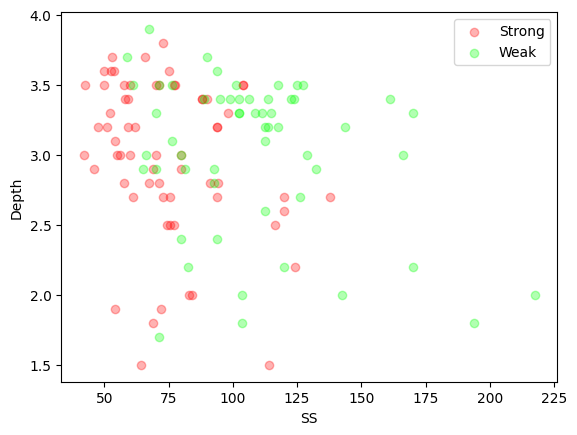

In [28]:
plt.xlabel("SS")
plt.ylabel("Depth")
plt.scatter(Weak.SS, Weak.Depth, color = "red", label = "Strong", alpha=0.3)
plt.scatter(Strong.SS, Strong.Depth, color = "lime", label = "Weak", alpha=0.3)
plt.legend()
plt.show()

In [29]:
dataset.Years = [1 if i == "Year_weak_wind" else 0 for i in dataset.Years]

In [30]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [31]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [34]:
print("Naive Bayes: ", nb.score(X_test, y_test))

Naive Bayes:  0.8888888888888888
